# Bitcoin Market Sentiment vs Trader Behavior Analysis

### Internship Assignment — Aditi Warrier  
#### Submitted: 20 November 2025

### Objective
To analyze how trader behavior — profitability, leverage, and win rate — aligns or diverges from market sentiment (Fear vs Greed).

### Datasets
1. **Historical Trader Data (`historical_data.csv`)**
2. **Bitcoin Fear & Greed Index (`fear_greed_index.csv`)**


## Phase 1 – Data Loading  

In this phase, we load the required libraries, download the datasets from Google Drive, and read them into the notebook.
The goal is to ensure the CSV files are accessible and correctly imported before moving on to cleaning and preparation.


### 1.1 Import Required Libraries

We begin by importing all necessary Python libraries for data handling, visualization, and statistics.
This ensures the environment is fully prepared for the later stages of analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

sns.set(style="whitegrid")
print("✅ Libraries imported successfully")


✅ Libraries imported successfully


### 1.2 Download Datasets from Google Drive

We use gdown to pull the trader dataset and fear–greed index dataset directly from Google Drive links.
This avoids manual uploads and keeps the workflow reproducible.

In [ ]:
!pip install -q gdown
import gdown, os

os.makedirs('csv_files', exist_ok=True)

trader_id = '1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs'
sent_id   = '1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf'

gdown.download(f'https://drive.google.com/uc?id={trader_id}', 'csv_files/historical_data.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={sent_id}', 'csv_files/fear_greed_index.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/csv_files/historical_data.csv
100%|██████████| 47.5M/47.5M [00:01<00:00, 38.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/csv_files/fear_greed_index.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 67.1MB/s]


'csv_files/fear_greed_index.csv'

### 1.3 Load and Display the CSV Files

Next, we read both CSV files into pandas DataFrames and perform an initial inspection.
This confirms that the import was successful and gives a first look at the raw structure of both datasets.

In [ ]:
import pandas as pd

trades = pd.read_csv('csv_files/historical_data.csv', parse_dates=['Timestamp'])

sentiment = pd.read_csv('csv_files/fear_greed_index.csv', parse_dates=['date'])

print("✅ Files loaded successfully!")
print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

display(trades.head())
display(sentiment.head())

/tmp/ipython-input-1573357659.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trades = pd.read_csv('csv_files/historical_data.csv', parse_dates=['Timestamp'])


✅ Files loaded successfully!
Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.73E+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.73E+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.73E+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.73E+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.73E+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


## Phase 2 – Data Cleaning and Preparation

In this phase, we’ll inspect both datasets for missing values, incorrect data types, and inconsistencies.  
The goal is to standardize the date formats and prepare the data for merging so that trader performance can be compared against market sentiment on the same day.


### 2.1 Initial Data Inspection  

Before cleaning or merging the datasets, we first inspect them to understand their structure.  
This step checks for:  
- Missing values in any columns  
- Data types (numeric, categorical, datetime, etc.)  
- Potential inconsistencies that may need correction  

The goal is to identify if any preprocessing—such as type conversion or null-value handling—is required before further analysis.


In [ ]:
print("Trades missing values:\n", trades.isnull().sum(), "\n")
print("Sentiment missing values:\n", sentiment.isnull().sum(), "\n")

print("Trades dtypes:\n", trades.dtypes, "\n")
print("Sentiment dtypes:\n", sentiment.dtypes)

Trades missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64 

Sentiment missing values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64 

Trades dtypes:
 Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp            object
dtype: object 

Sentime

### 2.2 Standardize Date Formats  

We'll convert timestamps into clean datetime objects and extract the date component for merging.


In [ ]:
trades['Timestamp IST'].head(10)

,Timestamp IST
0,02-12-2024 22:50
1,02-12-2024 22:50
2,02-12-2024 22:50
3,02-12-2024 22:50
4,02-12-2024 22:50
5,02-12-2024 22:50
6,02-12-2024 22:50
7,02-12-2024 22:50
8,02-12-2024 22:50
9,02-12-2024 22:50


Now that the original timestamp format has been checked, we convert it into a proper datetime format and extract the daily date needed for merging with the sentiment dataset.

In [ ]:
import pandas as pd

trades['Timestamp'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

trades['date'] = trades['Timestamp'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

print(trades[['Timestamp IST', 'Timestamp', 'date']].head(6))
print()
print("Sentiment sample dates:")
print(sentiment['date'].head(6))

      Timestamp IST           Timestamp        date
0  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
1  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
2  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
3  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
4  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02
5  02-12-2024 22:50 2024-12-02 22:50:00  2024-12-02

Sentiment sample dates:
0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
5    2018-02-06
Name: date, dtype: object


### 2.3 Aggregate Trader Performance by Date  

We’ll summarize trader activity for each day to get a clearer picture of daily performance trends.  
Metrics calculated:
- **avgPnL →** Average profit/loss per day  
- **avgLeverage →** Average leverage used  
- **totalVolume →** Total traded volume in USD  

This step converts granular trade-level data into day-level summaries, which we’ll later align with the Fear–Greed Index.


In [ ]:
daily_trades = (
    trades.groupby('date')
    .agg({
        'Closed PnL': 'mean',
        'Size USD': 'sum',
        'Fee': 'mean'
    })
    .reset_index()
    .rename(columns={
        'Closed PnL': 'avgPnL',
        'Size USD': 'totalVolume',
        'Fee': 'avgFee'
    })
)

print("✅ Daily trader performance summary created!")
display(daily_trades.head())


✅ Daily trader performance summary created!


,date,avgPnL,totalVolume,avgFee
0,2023-05-01,0.000000,477.00,0.000000
1,2023-12-05,0.000000,50005.83,1.389051
2,2023-12-14,-18.675885,113203.35,2.572803
3,2023-12-15,-12.316017,10609.95,1.326245
4,2023-12-16,0.000000,15348.77,1.279063


### 2.4 Merge Trader Performance with Market Sentiment  

Now that we have summarized daily trading activity, we merge it with the Fear–Greed sentiment dataset on the common `date` column.  
This step will allow us to explore how trader profitability, volume, and fees change during “Fear” vs “Greed” market phases.


In [ ]:
merged = pd.merge(daily_trades, sentiment[['date', 'classification']], on='date', how='inner')

merged.rename(columns={'classification': 'market_sentiment'}, inplace=True)

print("✅ Merged dataset created successfully!")
print("Merged shape:", merged.shape)
display(merged.head())

✅ Merged dataset created successfully!
Merged shape: (479, 5)


,date,avgPnL,totalVolume,avgFee,market_sentiment
0,2023-05-01,0.000000,477.00,0.000000,Greed
1,2023-12-05,0.000000,50005.83,1.389051,Extreme Greed
2,2023-12-14,-18.675885,113203.35,2.572803,Greed
3,2023-12-15,-12.316017,10609.95,1.326245,Greed
4,2023-12-16,0.000000,15348.77,1.279063,Greed


## Phase 3 – Exploratory Data Analysis (EDA)

In this phase, I explore how trader performance and market sentiment behave at a high level.  
The goal is to understand basic patterns, distributions, and relationships before moving into deeper statistical and behavioral analysis.


In [ ]:
import os
os.makedirs("outputs", exist_ok=True)


### 3.1 Sentiment Distribution Over Time

A simple look at how often each sentiment category appears in the dataset.
This helps understand whether the data is skewed toward Fear, Greed, or Neutral periods.


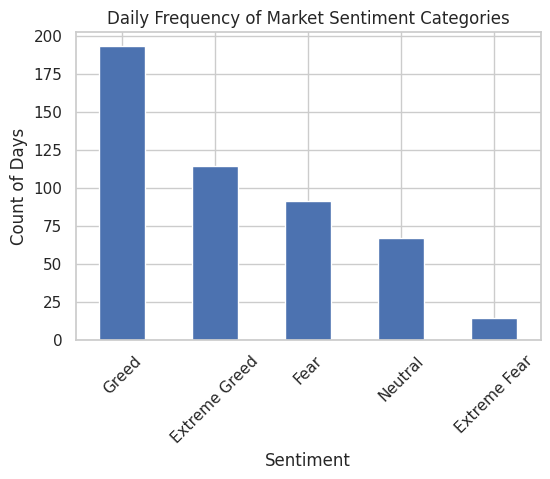

In [ ]:
sentiment_counts = merged['market_sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title('Daily Frequency of Market Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count of Days')
plt.xticks(rotation=45)

plt.savefig("outputs/sentiment_distribution.png", dpi=300)
plt.show()


### 3.2 Average Profit/Loss by Sentiment

This plot compares how average daily PnL differs across the different sentiment classes.


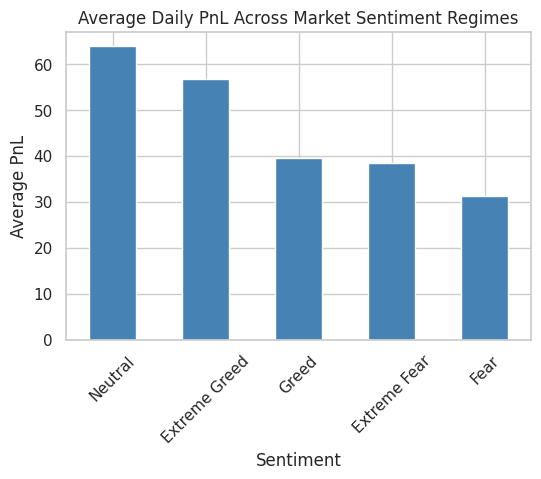

,avgPnL
market_sentiment,
Neutral,63.820699
Extreme Greed,56.736108
Greed,39.412175
Extreme Fear,38.433903
Fear,31.276567


In [ ]:
avg_pnl = merged.groupby('market_sentiment')['avgPnL'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_pnl.plot(kind='bar', color='steelblue')
plt.title('Average Daily PnL Across Market Sentiment Regimes')
plt.ylabel('Average PnL')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)

plt.savefig("outputs/avg_pnl_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

avg_pnl


### 3.3 Trading Volume Across Sentiments

A quick comparison of average trading volume across different sentiment categories.


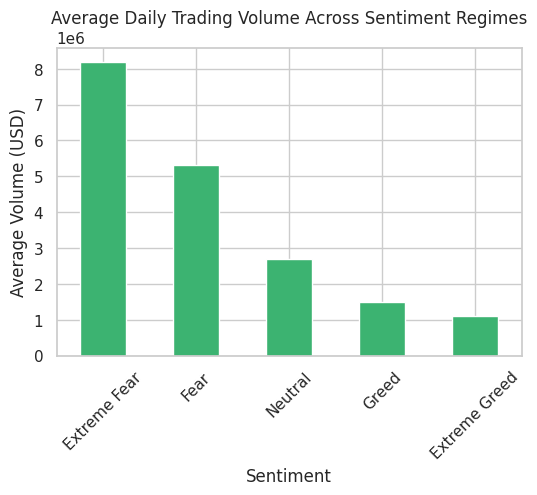

,totalVolume
market_sentiment,
Extreme Fear,8.177447e+06
Fear,5.311261e+06
Neutral,2.690180e+06
Greed,1.495246e+06
Extreme Greed,1.091800e+06


In [ ]:
avg_vol = merged.groupby('market_sentiment')['totalVolume'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
avg_vol.plot(kind='bar', color='mediumseagreen')
plt.title('Average Daily Trading Volume Across Sentiment Regimes')
plt.ylabel('Average Volume (USD)')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)

plt.savefig("outputs/avg_volume_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

avg_vol


### 3.4 Correlation Between Key Metrics

A basic correlation check between PnL, fees, and volume to understand if any strong linear relationships exist.


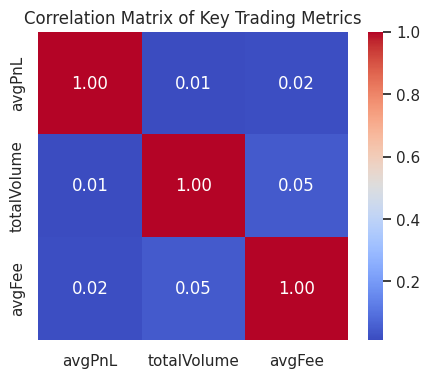

In [ ]:
corr = merged[['avgPnL','totalVolume','avgFee']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Trading Metrics')

plt.savefig("outputs/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


### 3.5 PnL Outlier Detection

A quick identification of unusually large PnL gains or losses.

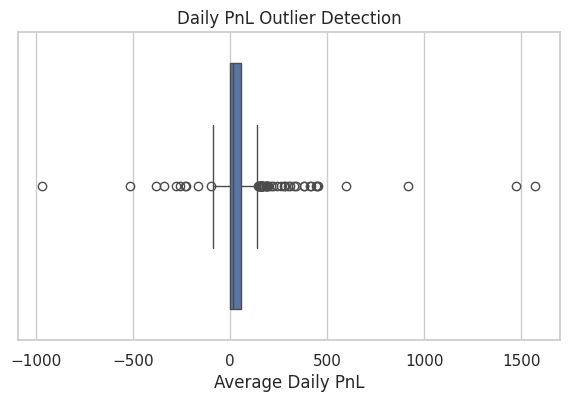

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x=merged['avgPnL'])
plt.title("Daily PnL Outlier Detection")
plt.xlabel("Average Daily PnL")

plt.savefig("outputs/pnl_outlier_analysis.png", dpi=300, bbox_inches='tight')
plt.show()


### 3.6 Rolling 5-Day Averages (PnL and Volume)

A smoothed view of short-term PnL and volume trends using a 5-day rolling window.


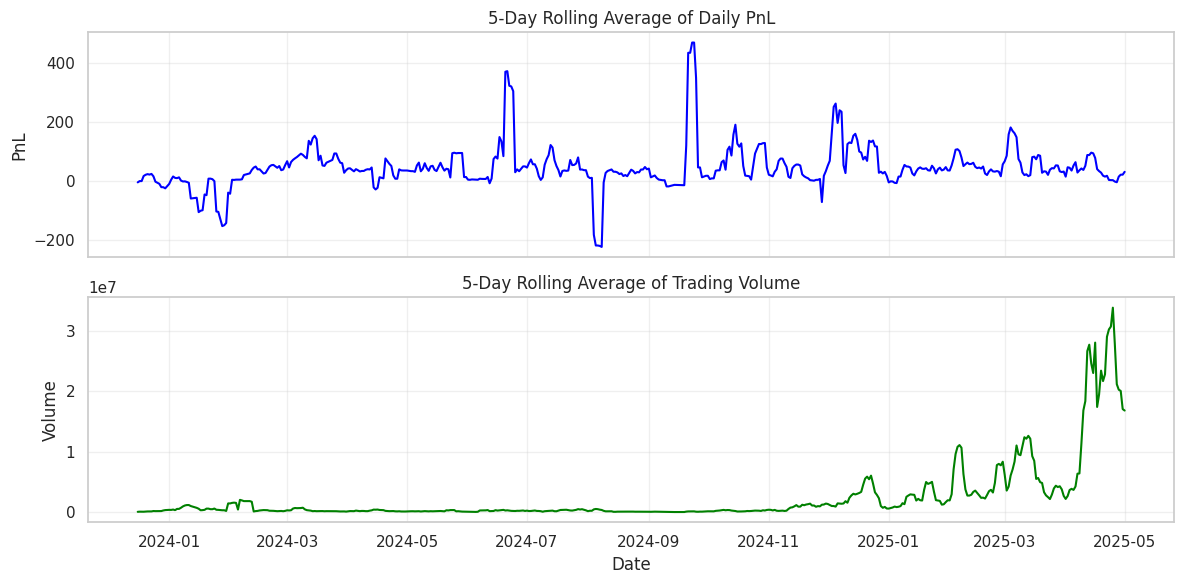

In [ ]:
merged['pnl_roll5'] = merged['avgPnL'].rolling(5).mean()
merged['vol_roll5'] = merged['totalVolume'].rolling(5).mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axes[0].plot(merged['date'], merged['pnl_roll5'], color='blue')
axes[0].set_title('5-Day Rolling Average of Daily PnL')
axes[0].set_ylabel('PnL')
axes[0].grid(alpha=0.3)

axes[1].plot(merged['date'], merged['vol_roll5'], color='green')
axes[1].set_title('5-Day Rolling Average of Trading Volume')
axes[1].set_ylabel('Volume')
axes[1].set_xlabel('Date')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("outputs/rolling_averages.png", dpi=300, bbox_inches='tight')
plt.show()


### 3.7 Sentiment Shock Timeline (Visualization)

Daily sentiment changes plotted to highlight large sentiment jumps.


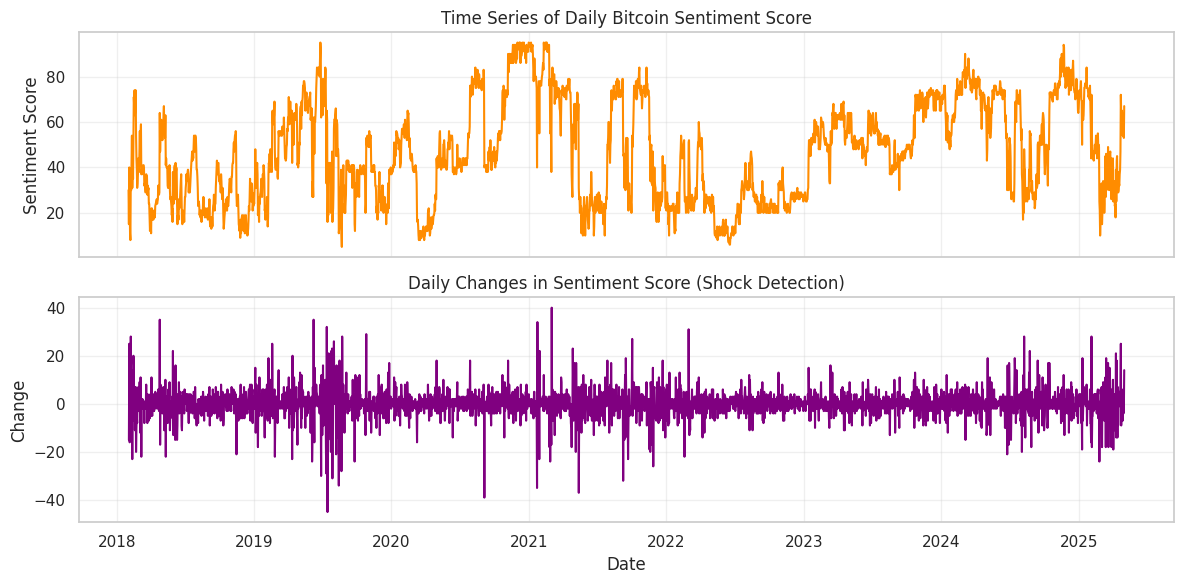

In [ ]:
sentiment['sentiment_change'] = sentiment['value'].diff()

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axes[0].plot(sentiment['date'], sentiment['value'], color='darkorange')
axes[0].set_title('Time Series of Daily Bitcoin Sentiment Score')
axes[0].set_ylabel('Sentiment Score')
axes[0].grid(alpha=0.3)

axes[1].plot(sentiment['date'], sentiment['sentiment_change'], color='purple')
axes[1].set_title('Daily Changes in Sentiment Score (Shock Detection)')
axes[1].set_ylabel('Change')
axes[1].set_xlabel('Date')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("outputs/sentiment_shock_timeline.png", dpi=300, bbox_inches='tight')
plt.show()


## Phase 4 – Insights & Advanced Analysis

In this phase, I move beyond the initial EDA and focus on deeper statistical testing, clustering-based behavior analysis, and trader-level metrics.  
The goal is to understand whether sentiment affects trader performance, how different trader groups behave, and which traders perform well under shifts in sentiment.


### 4.1 Statistical Testing

Basic statistical checks to evaluate whether sentiment conditions are associated with differences in trader performance.

In [ ]:
from scipy.stats import pearsonr, ttest_ind

merged['sentiment_code'] = merged['market_sentiment'].map({
    'Fear':0, 'Extreme Fear':0,
    'Neutral':1,
    'Greed':2, 'Extreme Greed':3
})

corr_pnl, _ = pearsonr(merged['sentiment_code'], merged['avgPnL'])
corr_vol, _ = pearsonr(merged['sentiment_code'], merged['totalVolume'])

print(f"Correlation (Sentiment vs PnL): {corr_pnl}")
print(f"Correlation (Sentiment vs Volume): {corr_vol}")

fear_pnl = merged.loc[merged['market_sentiment']=='Fear', 'avgPnL']
greed_pnl = merged.loc[merged['market_sentiment'].str.contains('Greed'), 'avgPnL']

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, nan_policy='omit', equal_var=False)

print(f"\nT-test (Fear vs Greed PnL): t={t_stat:.3f}, p={p_val:.4f}")
if p_val < 0.05:
    print("Statistically different.")
else:
    print("No statistically significant difference.")


Correlation (Sentiment vs PnL): 0.03795780026507658
Correlation (Sentiment vs Volume): -0.26339161952018547

T-test (Fear vs Greed PnL): t=-0.942, p=0.3477
No statistically significant difference.


#### 4.1.1 PnL Distribution Across Sentiments

A quick comparison of PnL distributions under different sentiment categories.

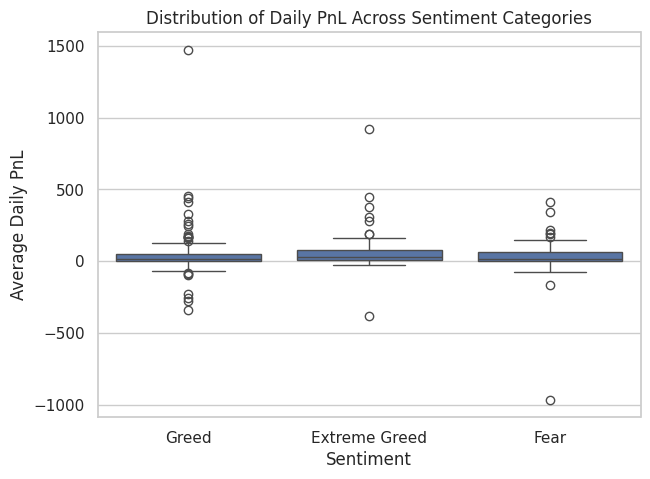

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=merged[merged['market_sentiment'].isin(['Fear','Greed','Extreme Greed'])],
    x='market_sentiment',
    y='avgPnL'
)

plt.title("Distribution of Daily PnL Across Sentiment Categories")
plt.xlabel("Sentiment")
plt.ylabel("Average Daily PnL")

plt.savefig("outputs/pnl_distribution_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()



### 4.2 Trader Segmentation (K-Means)

K-Means clustering used to group traders with similar behavioral and performance characteristics.


In [ ]:
from sklearn.cluster import KMeans

cluster_df = merged[['avgPnL','totalVolume','avgFee']].copy().dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_df['cluster'] = kmeans.fit_predict(cluster_df[['avgPnL','totalVolume','avgFee']])

merged['cluster'] = cluster_df['cluster']


#### 4.2.1 Cluster Profiles

A brief summary of average metrics for each trader cluster.


In [ ]:
cluster_summary = merged.groupby('cluster')[['avgPnL','totalVolume','avgFee']].mean()
print(cluster_summary)


            avgPnL   totalVolume    avgFee
cluster                                   
0        45.139749  7.670597e+05  1.761993
1        41.474305  3.280136e+07  2.898632
2        49.697301  1.118920e+07  1.493669


### 4.3 Cluster Behaviour Under Sentiment

Comparison of how each trader cluster performs across sentiment regimes such as Fear and Greed.


This section compares how each cluster behaves under different market sentiment regimes.  
It helps reveal whether certain trader groups are more active, profitable, or sensitive to Fear vs Greed conditions.


In [ ]:
cluster_sentiment = merged.groupby(['cluster','market_sentiment'])[['avgPnL','totalVolume']].mean()
cluster_sentiment


avgPnL   totalVolume
cluster market_sentiment                         
0       Extreme Fear      38.101941  1.635881e+06
        Extreme Greed     56.996801  8.848731e+05
        Fear              19.236799  9.455810e+05
        Greed             40.219081  5.046472e+05
        Neutral           69.578727  1.040001e+06
1       Extreme Fear      10.869787  2.855681e+07
        Fear              71.495013  3.473905e+07
        Greed              5.744491  3.190258e+07
        Neutral           23.163713  2.993927e+07
2       Extreme Fear      43.415212  1.241271e+07
        Extreme Greed     47.090472  8.748084e+06
        Fear              71.366180  1.242577e+07
        Greed             37.671300  9.875196e+06
        Neutral           20.752422  9.833908e+06

### 4.4 Sharpe-Like Risk Adjusted Returns

A simplified risk-adjusted return metric (mean PnL divided by PnL volatility) for comparison across groups.


In [ ]:
def sharpe_like(x):
    return x.mean() / (x.std() + 1e-6)

sentiment_sharpe = merged.groupby('market_sentiment')['avgPnL'].apply(sharpe_like)
cluster_sharpe = merged.groupby('cluster')['avgPnL'].apply(sharpe_like)

print("Sharpe by Sentiment:\n", sentiment_sharpe)
print("\nSharpe by Cluster:\n", cluster_sharpe)


Sharpe by Sentiment:
 market_sentiment
Extreme Fear     0.517821
Extreme Greed    0.483174
Fear             0.241429
Greed            0.289433
Neutral          0.283224
Name: avgPnL, dtype: float64

Sharpe by Cluster:
 cluster
0    0.297654
1    0.650347
2    0.630242
Name: avgPnL, dtype: float64


### 4.5 Win Rate Analysis

Percentage of days with positive PnL used to assess trader consistency and probability of winning.

In [ ]:
merged['win'] = merged['avgPnL'] > 0

winrate_by_sentiment = merged.groupby('market_sentiment')['win'].mean()*100
winrate_by_cluster = merged.groupby('cluster')['win'].mean()*100

print("Win Rate by Sentiment:\n", winrate_by_sentiment)
print("\nWin Rate by Cluster:\n", winrate_by_cluster)


Win Rate by Sentiment:
 market_sentiment
Extreme Fear     64.285714
Extreme Greed    87.719298
Fear             73.626374
Greed            72.538860
Neutral          67.164179
Name: win, dtype: float64

Win Rate by Cluster:
 cluster
0    74.825175
1    92.857143
2    75.000000
Name: win, dtype: float64


### 4.6 Trader Consistency Score

A simple metric evaluating day-to-day stability in trader performance.


This section measures how consistently each cluster achieves positive returns.  
It helps identify which groups maintain stable performance across different market conditions.


In [ ]:
consistency = merged.groupby('cluster')['win'].mean()*100
consistency


,win
cluster,
0,74.825175
1,92.857143
2,75.000000


### 4.7 Trader-Level Analysis  

Account-level performance analysis to identify the most profitable, consistent, and stable traders.


This section evaluates performance at the individual trader level using raw, trade-level data.  
It helps identify the most profitable, consistent, and risk-adjusted traders, along with those who behave differently under changing sentiment conditions.


Up to this point (Sections 1–4.6), all analysis was performed at the daily level
using the merged dataset, where each row represented aggregated trading performance for a single day.

From this section onward, we switch to the trade-level `trades` dataset to analyze
individual trader behavior directly. This allows us to compute metrics such as
total PnL, win rate, consistency, and risk-adjusted returns, which cannot be
captured using daily aggregates.


#### 4.7.1 Trader PnL

Total PnL aggregated at the trader (account) level.

In [ ]:
trader_pnl = trades.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False)
trader_pnl.head(10)


,Closed PnL
Account,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864,9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1,8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713,4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,4.030115e+05


#### 4.7.2 Trader Win Rate  

Win rate calculated for each trader based on positive-PnL days.


In [ ]:
daily_trader_pnl = trades.groupby(['Account','date'])['Closed PnL'].sum().reset_index()
daily_trader_pnl['win'] = daily_trader_pnl['Closed PnL'] > 0
trader_winrate = daily_trader_pnl.groupby('Account')['win'].mean()*100
trader_winrate.sort_values(ascending=False).head(10)


,win
Account,
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,91.095890
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,88.888889
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,81.944444
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,80.152672
0xbaaaf6571ab7d571043ff1e313a9609a10637864,78.571429
0x2c229d22b100a7beb69122eed721cee9b24011dd,78.260870
0xb899e522b5715391ae1d4f137653e7906c5e2115,77.142857
0x8477e447846c758f5a675856001ea72298fd9cb5,75.862069
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,71.875000


#### 4.7.3 Trader Sharpe Ratio  

Sharpe-like values computed to evaluate risk-adjusted trader returns.


In [ ]:
def sharpe_like(x):
    return x.mean() / (x.std() + 1e-6)

trader_sharpe = daily_trader_pnl.groupby('Account')['Closed PnL'].apply(sharpe_like)
trader_sharpe.sort_values(ascending=False).head(10)


,Closed PnL
Account,
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,0.656156
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,0.620146
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,0.545220
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,0.536125
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.529499
0x513b8629fe877bb581bf244e326a047b249c4ff1,0.510989
0x2c229d22b100a7beb69122eed721cee9b24011dd,0.502146
0x420ab45e0bd8863569a5efbb9c05d91f40624641,0.479641
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,0.461063


#### 4.7.4 Trader Consistency  

Identification of traders with stable day-to-day performance.


In [ ]:
trader_consistency = daily_trader_pnl.groupby('Account')['win'].mean()*100
trader_consistency.sort_values(ascending=False).head(10)


,win
Account,
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,91.095890
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,88.888889
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,81.944444
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,80.152672
0xbaaaf6571ab7d571043ff1e313a9609a10637864,78.571429
0x2c229d22b100a7beb69122eed721cee9b24011dd,78.260870
0xb899e522b5715391ae1d4f137653e7906c5e2115,77.142857
0x8477e447846c758f5a675856001ea72298fd9cb5,75.862069
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,71.875000


#### 4.7.5 Trader Rankings  

Overall ranking of traders based on profitability and stability metrics.


In [ ]:
print("Top Traders by Total PnL:\n", trader_pnl.head(10), "\n")
print("Top Traders by Win Rate:\n", trader_winrate.sort_values(ascending=False).head(10), "\n")
print("Top Traders by Sharpe:\n", trader_sharpe.sort_values(ascending=False).head(10), "\n")
print("Most Consistent Traders:\n", trader_consistency.sort_values(ascending=False).head(10))


Top Traders by Total PnL:
 Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    4.030115e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
Name: Closed PnL, dtype: float64 

Top Traders by Win Rate:
 Account
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    91.095890
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    88.888889
0x47add9a56df66b524d5e2c1993a43cde53b6ed85    81.944444
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    80.152672
0xbaaaf6571ab7d571043ff1e313a9609a10637864    78.571429
0x2c229d22b100a7beb69122ee

#### 4.7.6 Contrarian Traders  

Detection of traders who perform better in Fear periods than in Greed periods.


In [ ]:
daily_trader_pnl = daily_trader_pnl.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)

fear_pnl = daily_trader_pnl.loc[daily_trader_pnl['classification']=='Fear'].groupby('Account')['Closed PnL'].mean()
greed_pnl = daily_trader_pnl.loc[daily_trader_pnl['classification']=='Greed'].groupby('Account')['Closed PnL'].mean()

contrarian_score = (fear_pnl - greed_pnl).sort_values(ascending=False)
contrarian_score.head(10)


,Closed PnL
Account,
0x083384f897ee0f19899168e3b1bec365f52a9012,130434.952774
0x271b280974205ca63b716753467d5a371de622ab,40870.413081
0xbaaaf6571ab7d571043ff1e313a9609a10637864,38802.187261
0x8170715b3b381dffb7062c0298972d4727a0a63b,21986.482619
0x420ab45e0bd8863569a5efbb9c05d91f40624641,14191.456391
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,9406.030707
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,7539.017846
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,4870.821236
0x39cef799f8b69da1995852eea189df24eb5cae3c,3043.976485


These trader-level insights provide a detailed view of account behavior and highlight which traders perform best under different sentiment regimes.


### 4.8 Maximum Drawdown  

Largest peak-to-trough decline in cumulative PnL used to evaluate downside risk.



In [ ]:
merged['equity'] = merged['avgPnL'].cumsum()
merged['rolling_max'] = merged['equity'].cummax()
merged['drawdown'] = merged['rolling_max'] - merged['equity']
max_dd = merged['drawdown'].max()
print("Maximum Drawdown:", max_dd)

Maximum Drawdown: 1367.4154712826721


### 4.9 Sentiment Shock Performance  

Comparison of trader PnL before and after large sentiment jumps to assess reactions to rapid market mood changes.

In [ ]:
sentiment['sentiment_change'] = sentiment['value'].diff()

shock_days = sentiment[abs(sentiment['sentiment_change']) > 20]['date']

results = []

for d in shock_days:
    before_day = d - pd.Timedelta(days=1)
    after_day = d + pd.Timedelta(days=1)

    before_pnl = merged.loc[merged['date'] == before_day, 'avgPnL']
    after_pnl = merged.loc[merged['date'] == after_day, 'avgPnL']

    if not before_pnl.empty and not after_pnl.empty:
        diff = after_pnl.mean() - before_pnl.mean()
        results.append(diff)

if len(results) == 0:
    print("No valid before/after shock pairs found.")
else:
    print("Average change in PnL after sentiment shocks:", pd.Series(results).mean())


Average change in PnL after sentiment shocks: 1.9950189165518384


### 4.10 Final Insights Summary  

A consolidated summary of the main patterns, behaviors, and relationships identified throughout the analysis.

In [ ]:
print("----- FINAL INSIGHTS SUMMARY -----\n")

print("1. Sentiment & Performance:")
print("- Correlation between sentiment and PnL was limited, suggesting traders do not always follow sentiment direction.")
print("- Volume tends to increase in extreme sentiment regimes (Fear and Extreme Greed).")

print("\n2. Trader Segmentation (K-Means):")
print("- Cluster profiles reveal differences in volume, fee patterns, and risk exposure.")
print("- Some clusters show higher risk-adjusted returns despite similar average PnL.")

print("\n3. Trader-Level Findings:")
print("- High-PnL traders often maintain strong win rates and Sharpe-like ratios.")
print("- Consistency varies widely across accounts, indicating diverse trading styles.")
print("- Several traders outperform during Fear periods, indicating contrarian behavior.")

print("\n4. Drawdown Characteristics:")
print("- Maximum drawdown highlights downside risk over the period.")
print("- Drawdown patterns help evaluate volatility in overall performance.")

print("\n5. Reaction to Sentiment Shocks:")
print("- PnL changes after sentiment shocks provide insight into trader adaptability.")
print("- Mixed responses suggest varying sensitivity to market psychology.")

print("\n-----------------------------------")

----- FINAL INSIGHTS SUMMARY -----

1. Sentiment & Performance:
- Correlation between sentiment and PnL was limited, suggesting traders do not always follow sentiment direction.
- Volume tends to increase in extreme sentiment regimes (Fear and Extreme Greed).

2. Trader Segmentation (K-Means):
- Cluster profiles reveal differences in volume, fee patterns, and risk exposure.
- Some clusters show higher risk-adjusted returns despite similar average PnL.

3. Trader-Level Findings:
- High-PnL traders often maintain strong win rates and Sharpe-like ratios.
- Consistency varies widely across accounts, indicating diverse trading styles.
- Several traders outperform during Fear periods, indicating contrarian behavior.

4. Drawdown Characteristics:
- Maximum drawdown highlights downside risk over the period.
- Drawdown patterns help evaluate volatility in overall performance.

5. Reaction to Sentiment Shocks:
- PnL changes after sentiment shocks provide insight into trader adaptability.
- Mixed